In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
from scipy.special import betainc, gamma

In [2]:

def random_walk(n_steps, n_walkers):
    positions = np.zeros(n_walkers, dtype=int)
    for _ in range(n_steps):
        steps = np.random.choice([-1, 1], size=n_walkers)
        positions += steps
    return positions

n_steps = 200  # Number of steps
n_walkers = 50000  # Number of walkers


########################################## parameters
N = 201
x = np.linspace(-(N-1)/2,(N-1)/2,num=N)
state = np.zeros(2*N, dtype=np.complex128)
## for unifrom superposition, uncomment the following
# state.fill(1/np.sqrt(2*N))
# for i in range(N,2*N):
#     state[i] *= 1j
state[int((N-1)/2)] =  1/np.sqrt(2)
state[int((3*N-1)/2)] = 1j/np.sqrt(2)
hadamard2 = np.asarray([[(1/np.sqrt(2)),(1/np.sqrt(2))],[(1/np.sqrt(2)),-(1/np.sqrt(2))]])    
H = np.kron(hadamard2, np.identity(N))

def S(state):
    temp = state[N]
    for i in range(N,2*N-1):
        state[i] = state[i+1]
    state[2*N-1] = temp
    
    temp = state[N-1]
    for i in range (N-1,0,-1):
        state[i] = state[i-1]
    state[0] = temp
    #print("state after S", state)
    return state
    
def C(state):
    state = np.matmul(H,state)
    #print("state after C", state)
    return state

# to check normalization, plus to get amplitudes of the state at various position n
def magn(state):
    magnit = np.zeros(N)
    # check = 0
    for i in range (0,N):
        #magnit[i] = abs(state[2*i] + state[2*i+1])**2
        magnit[i] = state[i].conjugate()*state[i] + state[N+i].conjugate()*state[N+i]
        #magnit[i] = abs(state[i])**2 + abs(state[N+i])**2
        # check += magnit[i]
    # print("check value", check)
    return magnit

In [3]:
runtime = 200
state_timestamp = np.zeros((2*N,runtime), dtype=np.complex128)
state_timestamp[:,0] = state
magnitude = np.zeros((N,runtime))
magnitude[:,0] = magn(state)
for j in range(1,runtime):
    state_timestamp[:,j] = S(C(state_timestamp[:,j-1]))
    magnitude[:,j] = magn(state_timestamp[:,j])


positions = random_walk(n_steps, n_walkers)

/var/folders/4g/hvkx9ls12r741x0652yfb8_40000gn/T/ipykernel_1714/3648574878.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  magnit[i] = state[i].conjugate()*state[i] + state[N+i].conjugate()*state[N+i]


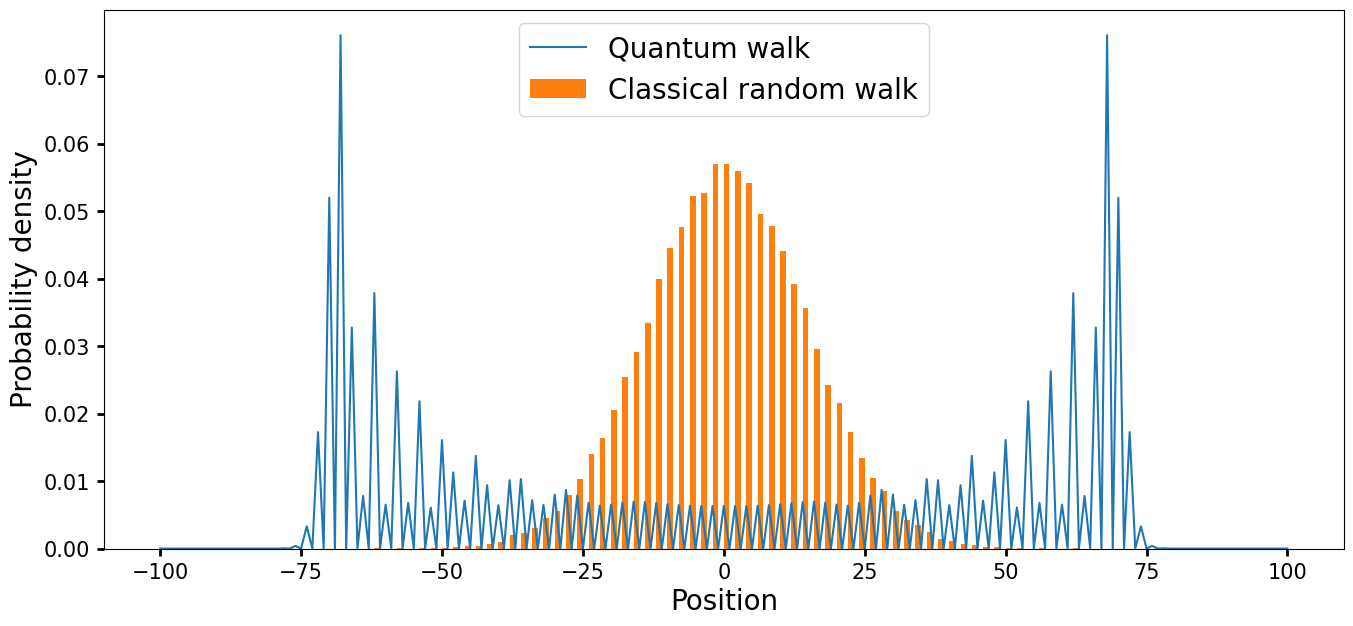

In [4]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)
ax.plot(x, magnitude[:,100])
ax.hist(positions, bins=range(positions.min()-10, positions.max()+10), density=True)
ax.set_xlabel('Position', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.legend(['Quantum walk', 'Classical random walk'], loc='upper center', fontsize=20)
ax.tick_params(axis='x',which='major',direction='out',length=5,width=2, pad= 5,labelsize=15)
ax.tick_params(axis='y',which='major',direction='out',length=5,width=2, pad= 5,labelsize=15)
fig.savefig('dtqw_crw.png')



## code to calculate the expected EE values for regular lattices (1D, 2D, 3D) for CRW 

for 1D lattice:  0.2707343986373127 for number of walkers:  230
[0.01078677 0.01080381 0.01082088 0.01083797 0.01085509]
0.1282637628805881


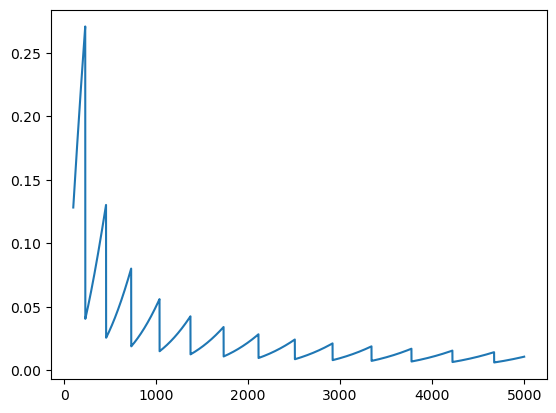

In [5]:
N = 729 ## lattice size
# walkers = np.arange(1,2000)
walkers = np.arange(100,5000)
ee_perc = np.zeros(len(walkers))
## 1D CRW
prob = 1/N
mean = walkers*prob
std = np.sqrt(mean*(1-prob))
# print(mean,std)
thresh = np.floor(mean + 3*std)

for i in range(len(walkers)):
    ee_perc[i] = betainc(thresh[i], walkers[i]-thresh[i]+1, prob)
## plot the results
plt.figure(1)
plt.plot(walkers[~np.isnan(ee_perc)], ee_perc[~np.isnan(ee_perc)])
## choose the index that givr the highest value of ee_perc
## use only the non nan values
ee_perc = ee_perc[~np.isnan(ee_perc)]
index = np.argmax(ee_perc)
print("for 1D lattice: ", ee_perc[index], "for number of walkers: ", walkers[index])
## the last few values 
print(ee_perc[-5:])
print(ee_perc[0])

for 2D lattice:  0.2707343986373127 for number of walkers:  230
[0.01078677 0.01080381 0.01082088 0.01083797 0.01085509]
0.1282637628805881


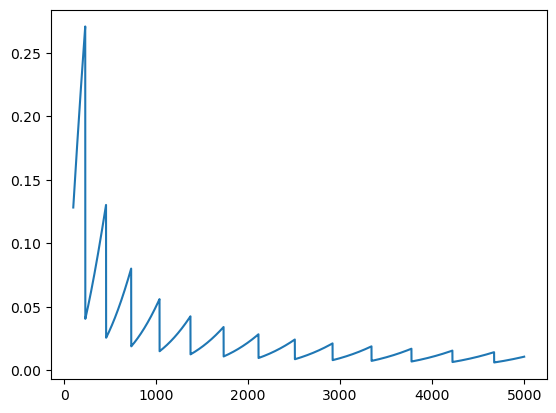

In [6]:
## 2D CRW
N = 729
degree = 4

walkers = np.arange(100,5000)
ee_perc = np.zeros(len(walkers))
## 1D CRW
degree = 2
prob = 1/N
mean = walkers*prob
std = np.sqrt(mean*(1-prob))
# print(mean,std)
thresh = np.floor(mean + 3*std)

for i in range(len(walkers)):
    ee_perc[i] = betainc(thresh[i], walkers[i]-thresh[i]+1, prob)
## plot the results
plt.figure(1)
plt.plot(walkers[~np.isnan(ee_perc)], ee_perc[~np.isnan(ee_perc)])
## choose the index that givr the highest value of ee_perc
## use only the non nan values
ee_perc = ee_perc[~np.isnan(ee_perc)]
index = np.argmax(ee_perc)
print("for 2D lattice: ", ee_perc[index], "for number of walkers: ", walkers[index])
## the last few values 
print(ee_perc[-5:])
print(ee_perc[0])

for 3D lattice:  0.2707343986373127 for number of walkers:  230
[0.00734151 0.00734986 0.0073582  0.00736656 0.00737493]
0.1282637628805881


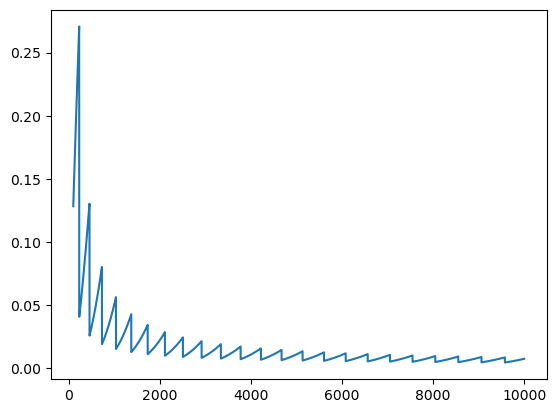

In [7]:
## 3D CRW

N = 729
resolution = 100
degree = 6

walkers = np.arange(100,10000)
ee_perc = np.zeros(len(walkers))
prob = 1/N
mean = walkers*prob
std = np.sqrt(mean*(1-prob))
# print(mean,std)
thresh = np.floor(mean + 3*std)
for i in range(len(walkers)):
    ee_perc[i] = betainc(thresh[i], walkers[i]-thresh[i]+1, prob)
## plot the results
plt.figure(1)
plt.plot(walkers[~np.isnan(ee_perc)], ee_perc[~np.isnan(ee_perc)])
## choose the index that givr the highest value of ee_perc
## use only the non nan values
ee_perc = ee_perc[~np.isnan(ee_perc)]
index = np.argmax(ee_perc)
print("for 3D lattice: ", ee_perc[index], "for number of walkers: ", walkers[index])
## the last few values 
print(ee_perc[-5:])
print(ee_perc[0])


## normalize w.r.t. the Walkers

0.002 0.044676615807377355
0.13602984742213206
(10000,)


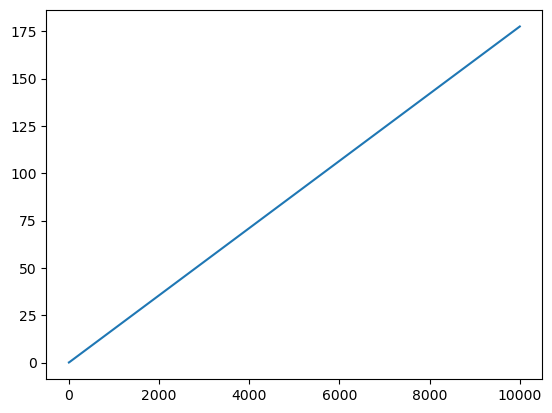

In [70]:
N = 500 ## lattice size
prob = 1/N
mean = prob
std = np.sqrt(mean*(1-prob))
thresh = mean + 3*std
print(mean,std)
print(thresh)
resolution = 10000
samples = np.arange(1,resolution+1)
ee_perc = np.zeros(resolution)

for res in samples:    
    vals = np.linspace(thresh, 1, res)
    for k in vals:
        ## calculate gamma function of r and 1-r
        g1 = 1
        g2 = gamma(k)
        g3 = gamma(1-k)
        ee_perc[res-1] += (g1 * np.power(prob, k) * np.power(1-prob, 1-k))/(g2*g3)
    # print(sum)
print(ee_perc[~np.isnan(ee_perc)].shape)

plt.plot(samples, ee_perc)
